# Statistiken der »UPPER LUSATIA Fantasy F1 FANS« Liga 2024

In [1]:
# Hier importieren wir alle notwendigen Module

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Hier lesen wir die Daten ein
data_quali = pd.read_csv("Data/Quali.csv", encoding="utf-8", sep=";", index_col=0)

In [16]:
#alle Werte zu int
data_quali = data_quali.astype(int)

## Qualifying

Anzahl der Pole Positions (meiste Punkte im Qualifying):

In [34]:
pole_position_counts = {}

# Loop durch jede Spalte
for column in data_quali.columns:
    # Finden Sie den Teilnehmer mit der höchsten Punktzahl in der aktuellen Spalte
    max_score = data_quali[column].max()

    # Überprüfen, ob es mehrere Teilnehmer mit der höchsten Punktzahl gibt
    max_participants = data_quali[data_quali[column] == max_score].index.tolist()
    
    # Loop durch jeden Teilnehmer in der Liste der Teilnehmer mit den höchsten Punktzahlen
    for participant in max_participants:
        # Wenn der Teilnehmer nicht im Dictionary ist, füge ihn hinzu und setze den Zähler auf 1
        if participant not in pole_position_counts:
            pole_position_counts[participant] = 1
        else:
            # Andernfalls erhöhe den Zähler um 1
            pole_position_counts[participant] += 1
    
    # Füge Teilnehmer mit 0 Pole-Positionen hinzu
    for participant in data_quali.index:
        if participant not in pole_position_counts:
            pole_position_counts[participant] = 0
    

# Erstelle ein DataFrame aus dem Dictionary
pole_position_df = pd.DataFrame.from_dict(pole_position_counts, orient='index', columns=['Pole Positions'])
pole_position_df.index.name = 'Team'
pole_position_df.sort_values(by="Pole Positions", inplace=True, ascending=False)

## Rennen

In [6]:
# Hier lesen wir die Daten ein
data_rennen = pd.read_csv("Data/Rennen.csv", encoding="utf-8", sep=",", index_col=0)

In [7]:
#alle Werte zu int
data_rennen = data_rennen.astype(int)

In [8]:
Rennsiege_counts = {}

# Loop durch jede Spalte
for column in data_rennen.columns:
    # Finden Sie den Teilnehmer mit der höchsten Punktzahl in der aktuellen Spalte
    max_score = data_rennen[column].max()

    # Überprüfen, ob es mehrere Teilnehmer mit der höchsten Punktzahl gibt
    max_participants = data_rennen[data_rennen[column] == max_score].index.tolist()
    
    # Loop durch jeden Teilnehmer in der Liste der Teilnehmer mit den höchsten Punktzahlen
    for participant in max_participants:
        # Wenn der Teilnehmer nicht im Dictionary ist, füge ihn hinzu und setze den Zähler auf 1
        if participant not in Rennsiege_counts:
            Rennsiege_counts[participant] = 1
        else:
            # Andernfalls erhöhe den Zähler um 1
            Rennsiege_counts[participant] += 1
    
    # Füge Teilnehmer mit 0 Pole-Positionen hinzu
    for participant in data_rennen.index:
        if participant not in Rennsiege_counts:
            Rennsiege_counts[participant] = 0

# Erstelle ein DataFrame aus dem Dictionary
Rennsiege_df = pd.DataFrame.from_dict(Rennsiege_counts, orient='index', columns=['Rennsiege'])
Rennsiege_df.index.name = 'Team'
Rennsiege_df.sort_values(by="Rennsiege", inplace=True, ascending=False)

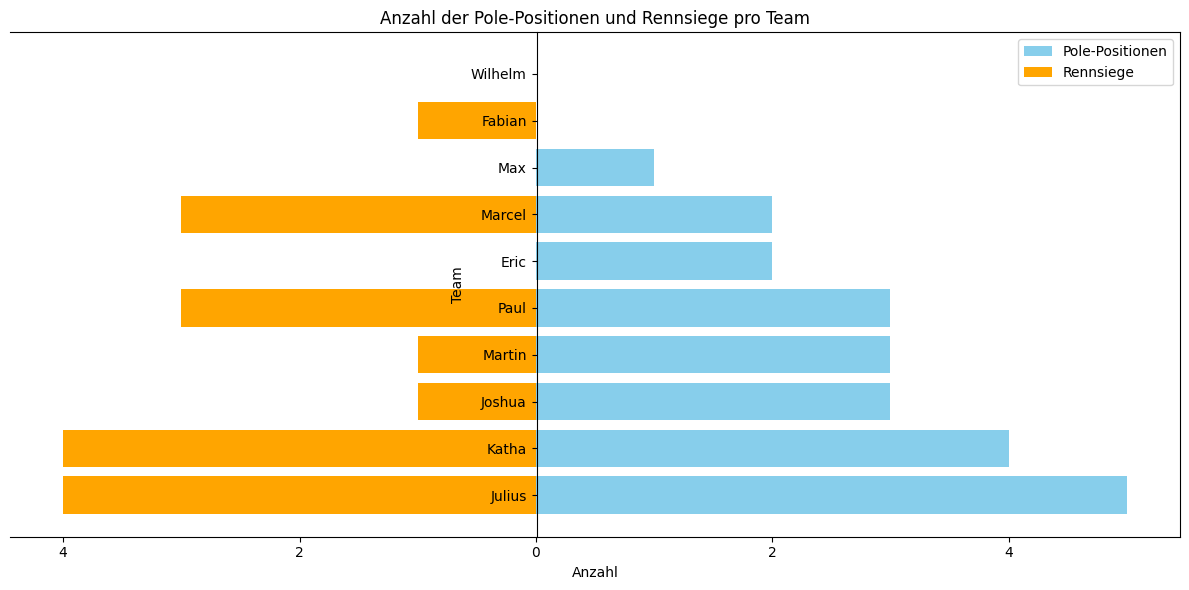

In [26]:
# Diagramm erstellen
fig, ax = plt.subplots(figsize=(12, 6))

# Balken für Pole-Positionen (nach links)
ax.barh(pole_position_df.index, pole_position_df['Pole Positions'], color='skyblue', label='Pole-Positionen', align='center')

# Balken für Rennsiege (nach rechts)
ax.barh(Rennsiege_df.index, -Rennsiege_df['Rennsiege'], color='orange', label='Rennsiege', align='center')

# Achsenbeschriftungen und Titel
ax.set_xlabel('Anzahl')
ax.set_ylabel('Team')
ax.set_title('Anzahl der Pole-Positionen und Rennsiege pro Team')

# Legende
ax.legend()

# Y-Achse in die Mitte verschieben
ax.spines['left'].set_position(('axes', 0.45))

ax.xaxis.set_major_formatter(lambda x, pos: f'{abs(x):g}')


# Diagramm anzeigen
plt.tight_layout()
plt.show()

In [27]:
#Hier erstellen wir eine neues Dataframe um die Gesamtpunkte anzuzeigen
rennen_gesamt = pd.DataFrame()

# Schleife über die Spalten der Ausgangstabelle
for spalten_index, spalte in enumerate(data_rennen.columns):
    # Berechnen der kumulativen Summe für jede Spalte
    neue_spalte = data_rennen.iloc[:, :spalten_index + 1].sum(axis=1)
    # Hinzufügen der neuen Spalte zur neuen Tabelle
    rennen_gesamt[f'Summe bis Spalte {spalten_index + 1}'] = neue_spalte

# Umbenennen der Spalten in numerische Reihenfolge
rennen_gesamt.columns = range(1, len(rennen_gesamt.columns) + 1)
rennen_gesamt.sort_values(by=rennen_gesamt.columns[-1], inplace=True, ascending=False)

Saisonverlauf (Punkte der Rennwochenenden addiert)

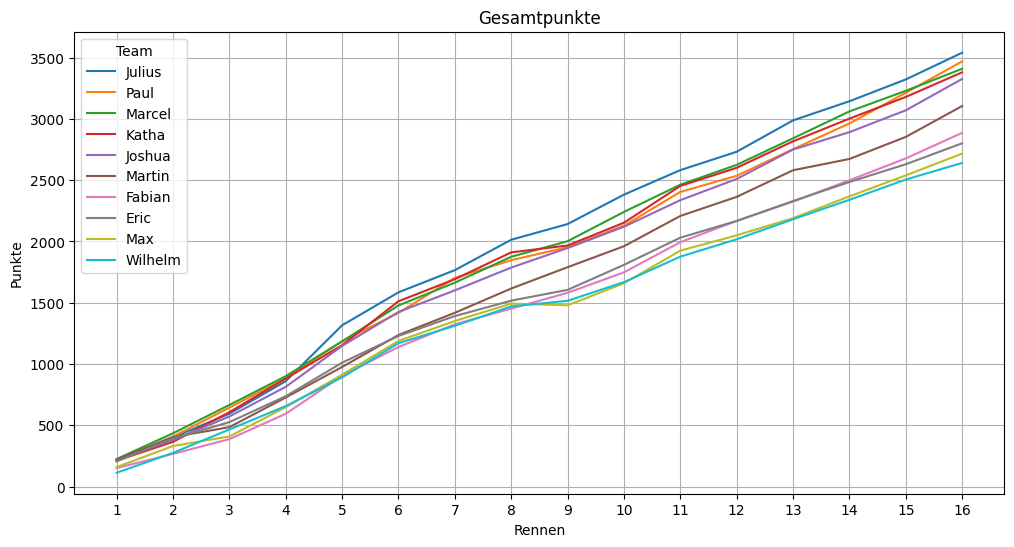

In [28]:
# Transponieren des DataFrames
rennen_gesamt_transponiert = rennen_gesamt.transpose()

# Erstellen des Liniendiagramms
rennen_gesamt_transponiert.plot(kind='line', figsize=(12, 6))

# Anpassen der Intervalle auf der x-Achse
plt.xticks(range(1, len(rennen_gesamt_transponiert) + 1))

#Grid
plt.grid(True)

# Anpassen der Achsenbeschriftungen und des Titels
plt.xlabel('Rennen')
plt.ylabel('Punkte')
plt.title('Gesamtpunkte')

# Anzeigen des Diagramms
plt.show()


In [29]:
rennen_gesamtrang = rennen_gesamt.rank(ascending=False)
rennen_gesamtrang = rennen_gesamtrang.astype("int")
rennen_gesamtrang.sort_values(by=rennen_gesamtrang.columns[-1], inplace=True)

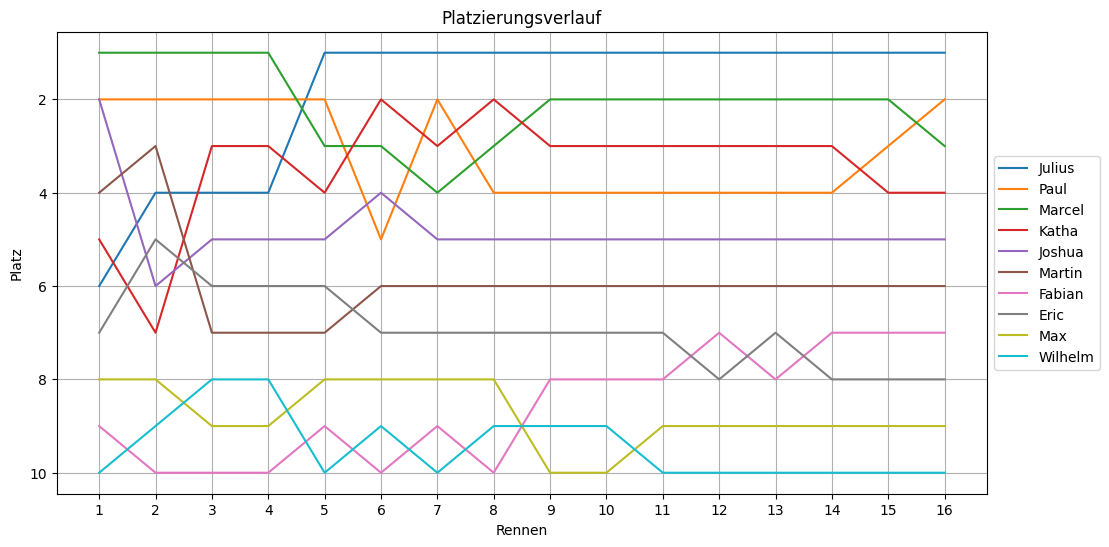

In [30]:
# Transponieren des DataFrames
rennen_gesamtrang_transponiert = rennen_gesamtrang.transpose()

# Erstellen des Liniendiagramms
rennen_gesamtrang_transponiert.plot(kind='line', figsize=(12, 6))

plt.gca().invert_yaxis()

# Anpassen der Achsenbeschriftungen und des Titels
plt.xlabel('Rennen')
plt.ylabel('Platz')
plt.title('Platzierungsverlauf')

# Anzeigen des Diagramms
plt.grid(True)

# Legende am rechten Rand platzieren
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Anpassen der Intervalle auf der x-Achse
plt.xticks(range(1, len(rennen_gesamtrang_transponiert) + 1))
        
# Anzeigen des Diagramms
plt.show()


In [31]:
#Hier erstellen wir eine neue Zeile, welche den Durchschnitt der Liga abbildet
data_rennen_average = rennen_gesamt
average = rennen_gesamt.mean()

data_rennen_average.loc[11] = average
data_rennen_average = data_rennen_average.rename(index={11: 'Average'})

In [32]:
import pandas as pd

# Hier erstellen wir ein neues DataFrame, welches den Abstand zum Durchschnitt abbildet
Abstände = pd.DataFrame()

# Holen des Durchschnitts für jede Spalte aus der elften Zeile
durchschnittszeile = data_rennen_average.iloc[-1]

# Schleife über die Spalten der Ausgangstabelle
for spalte in data_rennen_average.columns:
    # Berechnen der Differenz jedes Elements in der aktuellen Spalte zum Durchschnitt in der elften Zeile
    neue_spalte = data_rennen_average[spalte] - durchschnittszeile[spalte]
    
    # Hinzufügen der neuen Spalte zur neuen Tabelle
    Abstände[f'Abstand_{spalte}'] = neue_spalte

# Umbenennen der Spalten in numerische Reihenfolge
Abstände.columns = range(1, len(Abstände.columns) + 1)

Abstände.sort_values(Abstände.columns[-1], inplace=True, ascending=False)

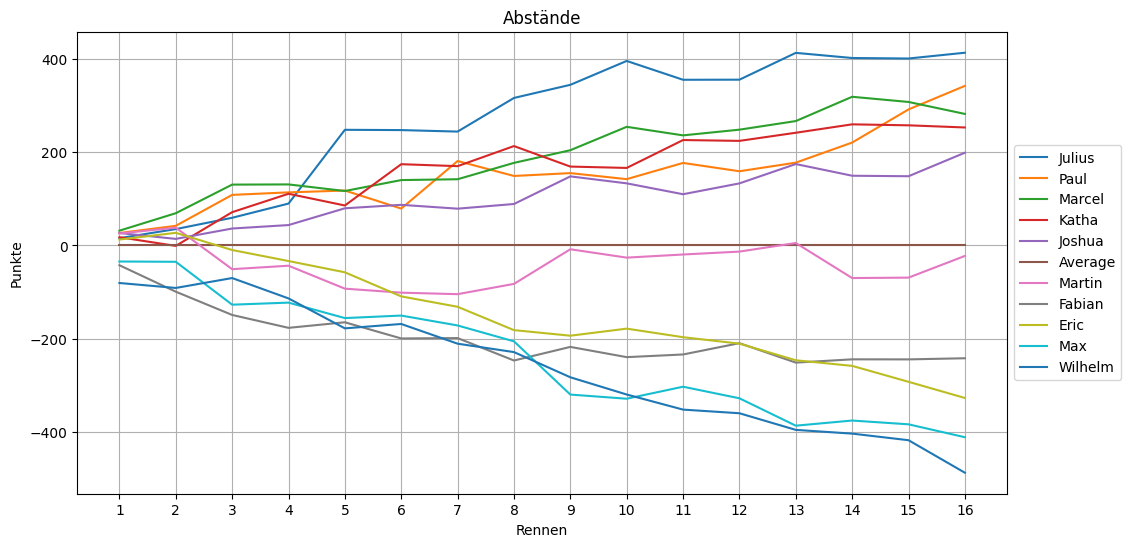

In [33]:
# Transponieren des DataFrames
Abstände_transponiert = Abstände.transpose()

# Erstellen des Liniendiagramms
Abstände_transponiert.plot(kind='line', figsize=(12, 6))

#plt.gca().invert_yaxis()

# Anpassen der Achsenbeschriftungen und des Titels
plt.xlabel('Rennen')
plt.ylabel('Punkte')
plt.title('Abstände')

# Anzeigen des Diagramms
plt.grid(True)

# Legende am rechten Rand platzieren
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Anpassen der Intervalle auf der x-Achse
plt.xticks(range(1, len(Abstände_transponiert) + 1))

        
# Anzeigen des Diagramms
plt.show()

In [35]:
!jupyter nbconvert --to html Statistics.ipynb --no-input --output="index.html"

[NbConvertApp] Converting notebook Statistics.ipynb to html
[NbConvertApp] Writing 1009381 bytes to index.html
